In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
import math
import random
import sklearn
from scipy.special import boxcox, inv_boxcox

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from math import sqrt

from catboost import CatBoostRegressor
from catboost import Pool, cv

%matplotlib inline

In [61]:
#!pip install --upgrade matplotlib==3.9.1

In [28]:
df = pd.read_excel('Выборка_Казань.xlsx', sheet_name = 0)
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Широта,Сцепка_к,Unnamed: 63,ПОИСК,Текст,Ремонт,Общая площадь,Год постройки,Этаж/Этажность,Ссылка
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,55.852829,49.063304 55.852829,NaN,0.0,Продаю 1к квартиру-студию 27 квм в новом ЖК Но...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,55.689431,49.206271 55.689431,NaN,0.0,Срочная Продажа Новой Квартиры- Студиипродаетс...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,55.784501,49.193946 55.784501,NaN,0.0,Продается однокомнатная квартира по адресу Аль...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,55.869248,49.09223 55.869248,NaN,0.0,Продается просторная однокомнатная квартира на...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,55.795767,49.207753 55.795767,NaN,0.0,Продаётся просторная евро двухкомнатная в ЖК С...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11937,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,55.777125,49.216709 55.777125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/3-k._kvart...
11938,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
11939,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
11940,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...


In [29]:
df = df[df['Мусор'] == 0]
df = df[df['outlier'] == 0]
df = df[df['dup'] == 0]
df = df[df['Многоуровневость'] == 0]
df = df[df['Терраса'] == 0]
df = df[df['Вид_2'] == 0]
#df = df[0:9531]
df.reset_index(drop = True , inplace = True )
df

,ID,Мусор,dup,outlier,out_PCA,Цена,Цена_перв,LN(Цена),BC(Цена),Цена_перв.1,...,Широта,Сцепка_к,Unnamed: 63,ПОИСК,Текст,Ремонт,Общая площадь,Год постройки,Этаж/Этажность,Ссылка
0,1_avito,0,0,0,0.0,5200000,5 200 000 ₽,15.464169,4.897233,NaN,...,55.852829,49.063304 55.852829,NaN,0.0,Продаю 1к квартиру-студию 27 квм в новом ЖК Но...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
1,2_avito,0,0,0,0.0,5390000,5 390 000 ₽,15.500056,4.899012,NaN,...,55.689431,49.206271 55.689431,NaN,0.0,Срочная Продажа Новой Квартиры- Студиипродаетс...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/kvartira-s...
2,3_avito,0,0,0,0.0,9500000,9 500 000 ₽,16.066802,4.925531,NaN,...,55.784501,49.193946 55.784501,NaN,0.0,Продается однокомнатная квартира по адресу Аль...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
3,4_avito,0,0,0,0.0,6000000,6 000 000 ₽,15.607270,4.904255,NaN,...,55.869248,49.09223 55.869248,NaN,0.0,Продается просторная однокомнатная квартира на...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
4,5_avito,0,0,0,0.0,8100000,8 100 000 ₽,15.907375,4.918363,NaN,...,55.795767,49.207753 55.795767,NaN,0.0,Продаётся просторная евро двухкомнатная в ЖК С...,евро,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9494,9389_avito,0,0,0,0.0,16000000,NaN,16.588099,NaN,NaN,...,55.777125,49.216709 55.777125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/3-k._kvart...
9495,9390_avito,0,0,0,0.0,11299999,NaN,16.240313,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
9496,9391_avito,0,0,0,0.0,10199000,NaN,16.137800,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...
9497,9392_avito,0,0,0,0.0,11520000,NaN,16.259595,NaN,NaN,...,55.761041,49.150764 55.761041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.avito.ru/kazan/kvartiry/1-k._kvart...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9499 entries, 0 to 9498
Data columns (total 71 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                9499 non-null   object 
 1   Мусор             9499 non-null   int64  
 2   dup               9499 non-null   int64  
 3   outlier           9499 non-null   int64  
 4   out_PCA           9499 non-null   float64
 5   Цена              9499 non-null   int64  
 6   Цена_перв         9491 non-null   object 
 7   LN(Цена)          9499 non-null   float64
 8   BC(Цена)          9491 non-null   float64
 9   Цена_перв.1       1129 non-null   float64
 10  Цена(кв.м)        9499 non-null   float64
 11  Цена(кв.м)_ln     9495 non-null   float64
 12  Прогноз           9499 non-null   float64
 13  кв.м              9499 non-null   float64
 14  MAE               9499 non-null   float64
 15  MAPE              9499 non-null   float64
 16  out               275 non-null    float64


In [31]:
X = df[[
            'ОПлощадь',
            #'Этаж_1',
            #'Этаж_2',
            #'Этаж_3',
            'Этаж_4',
            'Этажность_1',
            'ГП_2',
            'Ремонт_2',
            #'Долгота',
            #'Широта',
            #'Раст_центр_1',
            'Раст_центр_2',
            'Раст_метро_2',
            'Районы_2',
            'ЖК_БД'
      ]]

Y = df['LN(Цена)']
#Y = df['BC(Цена)']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[1, 4, 5, 6, 7, 8]


In [15]:
len(X['Районы_2'].unique())

36

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9499 entries, 0 to 9498
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ОПлощадь      9499 non-null   float64
 1   Этаж_4        9499 non-null   object 
 2   Этажность_1   9499 non-null   float64
 3   ГП_2          9499 non-null   float64
 4   Ремонт_2      9499 non-null   object 
 5   Раст_центр_2  9499 non-null   object 
 6   Раст_метро_2  9499 non-null   object 
 7   Районы_2      9499 non-null   object 
 8   ЖК_БД         9499 non-null   object 
dtypes: float64(3), object(6)
memory usage: 668.0+ KB


# CV

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

#n_folds = 7
#kf = KFold(n_splits = n_folds,  = False, random_state = 0)

catb = CatBoostRegressor(
         iterations = 3500, #максимальное количество построенных деревьев
         random_seed = 6, 
         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
         max_depth = 5, #глубина дерева
         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
         #l2_leaf_reg = 20, #коэффициент при члене регуляризации L2 функции потерь
         #bagging_temperature = 1,
         #random_strength = 1,
         one_hot_max_size = 40, #не используем one hot encoding, а включаем one_hot_max_size
         #loss_function = 'MAE', #по умолчанию
         #eval_metric = 'MAPE', #MAPE
         #od_type = 'Iter', #если модель переобучилась
         #od_wait = 20
        ) #делай остановку через 20 итераций
         #если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
         #если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

shuffle_split = ShuffleSplit(n_splits = 10, test_size = 0.15, random_state = 0)

#массив для сохранения итоговых оценок
all_rmse = [] 
all_mae = []
all_mape = []
all_r2 = []

tr = []
te = []

for n, (tr_index, te_index) in enumerate(shuffle_split.split(X, Y)): #kf.split(X, Y)
    print('Обработка процесса №', n)
    
    tr.append(tr_index)
    te.append(te_index)
    
    # Split data and target
    X_train = X.iloc[tr_index]
    Y_train = Y.iloc[tr_index]
    X_test = X.iloc[te_index]
    Y_test = Y.iloc[te_index]


    catb.fit(X_train, Y_train, 
             cat_features = cat_features, #массив с индексами категориальных фичей
             eval_set = (X_test, Y_test),
             verbose = False, 
             #plot = True
            ) #включение графика
 
    pred_test = np.exp(catb.predict(X_test))
    mse_test = mse(np.exp(Y_test), pred_test)
    
    all_rmse.append(round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
    all_mae.append(round(mae(np.exp(Y_test), pred_test), 4))
    all_mape.append(round(mape(np.exp(Y_test), pred_test), 4))
    all_r2.append(r2_score(np.exp(Y_test), pred_test))

Обработка процесса № 0
Обработка процесса № 1
Обработка процесса № 2
Обработка процесса № 3
Обработка процесса № 4
Обработка процесса № 5
Обработка процесса № 6
Обработка процесса № 7
Обработка процесса № 8
Обработка процесса № 9


In [34]:
# массив оценок по k блокам
print('MAE:', all_mae)
print('RMSE:', all_rmse)
print('MAPE:', all_mape)
print('R2:', all_r2)

MAE: [680972.3945, 708183.4483, 693208.4983, 681812.9432, 708374.0601, 729791.2199, 702132.4836, 712057.4293, 717179.8058, 767530.9532]
RMSE: [1103487.615, 1178937.5291, 1064532.3215, 1064450.6793, 1144571.7005, 1196969.7709, 1121648.2313, 1188963.1212, 1189344.3989, 1339115.9205]
MAPE: [0.0814, 0.0806, 0.0833, 0.0799, 0.0815, 0.0839, 0.0832, 0.082, 0.0808, 0.0858]
R2: [0.9460321877400089, 0.9398970891664505, 0.9482103483643951, 0.9499726839289527, 0.9487837229724929, 0.948522880062455, 0.9482775015918304, 0.9428403038578739, 0.9503532758162646, 0.9361226869926745]


In [ ]:
MAE: [869930.8929, 840578.5788, 838670.0693, 880547.3684, 919409.7232, 866617.1705, 874699.8796, 843689.4147, 821918.6533, 862352.0312]
RMSE: [1453420.2481, 1472020.7389, 1452983.4455, 1560240.2753, 1676946.3679, 1541072.1404, 1558052.8951, 1387625.0597, 1392682.6148, 1546558.5923]
MAPE: [0.095, 0.0909, 0.0935, 0.0962, 0.0993, 0.0961, 0.0977, 0.0936, 0.0935, 0.0942]
R2: [0.9237622243114395, 0.9327649942663199, 0.9235774324530013, 0.91614077033856, 0.9135650238896154, 0.9058257919930196, 0.9043069748824295, 
     0.9371894787603439, 0.9225102460129204, 0.9268889023919552]

In [ ]:
MAE: [658884.1635, 658306.4022, 763491.1718, 703005.4265, 705833.3313, 736259.0948, 732221.6552, 660843.1213, 734582.6664, 723202.6179]
RMSE: [978137.0146, 1012573.745, 1197919.4311, 1217622.2303, 1131392.2019, 1249341.5113, 1129277.7046, 1050167.152, 1263047.481, 1216182.9965]
MAPE: [0.0797, 0.08, 0.0871, 0.0805, 0.0823, 0.083, 0.0856, 0.0769, 0.0818, 0.0825]
R2: [0.94887922521196, 0.9530348382585156, 0.9380553140598625, 0.9409976366146275, 0.9424583436674322, 0.943946268869, 0.9447603263562109, 0.9559115302529183, 0.9365572860159191, 0.9417151842893444]

In [35]:
# среднее значение mae
print('MAE_mean:', np.mean(all_mae))
print('RMSE_mean:', np.mean(all_rmse))
print('MAPE_mean:', np.mean(all_mape))
print('R2_mean:', np.mean(all_r2))

MAE_mean: 710124.3236200002
RMSE_mean: 1159202.1288200002
MAPE_mean: 0.08224000000000001
R2_mean: 0.9459012680493399


In [ ]:
MAE_mean: 861841.37819
RMSE_mean: 1504160.2378
MAPE_mean: 0.095
R2_mean: 0.9206531839299604

In [ ]:
MAE_mean: 707662.96509
RMSE_mean: 1144566.1468300002
MAPE_mean: 0.08194
R2_mean: 0.9446315953595791

# Модель старая

In [6]:
X = df[[
            'ОПлощадь',
            #'Этаж_1',
            #'Этаж_2',
            #'Этаж_3',
            'Этаж_4',
            'Этажность_1',
            'ГП_2',
            'Ремонт_2',
            #'Долгота',
            #'Широта',
            #'Раст_центр_1',
            'Раст_центр_2',
            'Раст_метро_2',
            'Районы_2',
            'ЖК_БД'
      ]]

Y = df['LN(Цена)']
#Y = df['BC(Цена)']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[1, 4, 5, 6, 7, 8]


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)

In [52]:
print(len(X_train))
print(len(X_test))

8074
1425


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 739333.9816
RMSE на обучении: 1271974.4235
MAPE на обучении: 0.0815
R2 на обучении: 0.9438
MAE на тесте: 855754.037
RMSE на тесте: 1534878.1081
MAPE на тесте: 0.0929
R2 на тесте: 0.9201
MAE: 756803.9362
RMSE: 1314782.3943
MAPE: 0.0832
R2: 0.9401


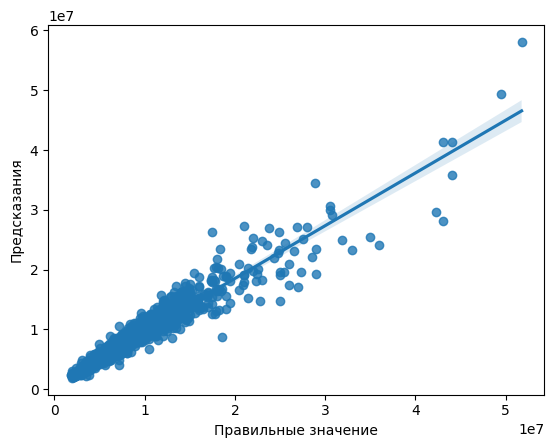

In [9]:
catb = CatBoostRegressor(iterations = 7000, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 6, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 40, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 5) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(x = np.exp(Y_test), y = pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [ ]:
MAE на обучении: 739333.9816
RMSE на обучении: 1271974.4235
MAPE на обучении: 0.0815
R2 на обучении: 0.9438
===============================
MAE на тесте: 855754.037
RMSE на тесте: 1534878.1081
MAPE на тесте: 0.0929
R2 на тесте: 0.9201
===============================
MAE: 756803.9362
RMSE: 1314782.3943
MAPE: 0.0832
R2: 0.9401

Text(0.5, 0, 'CatBoost Feature Importance')

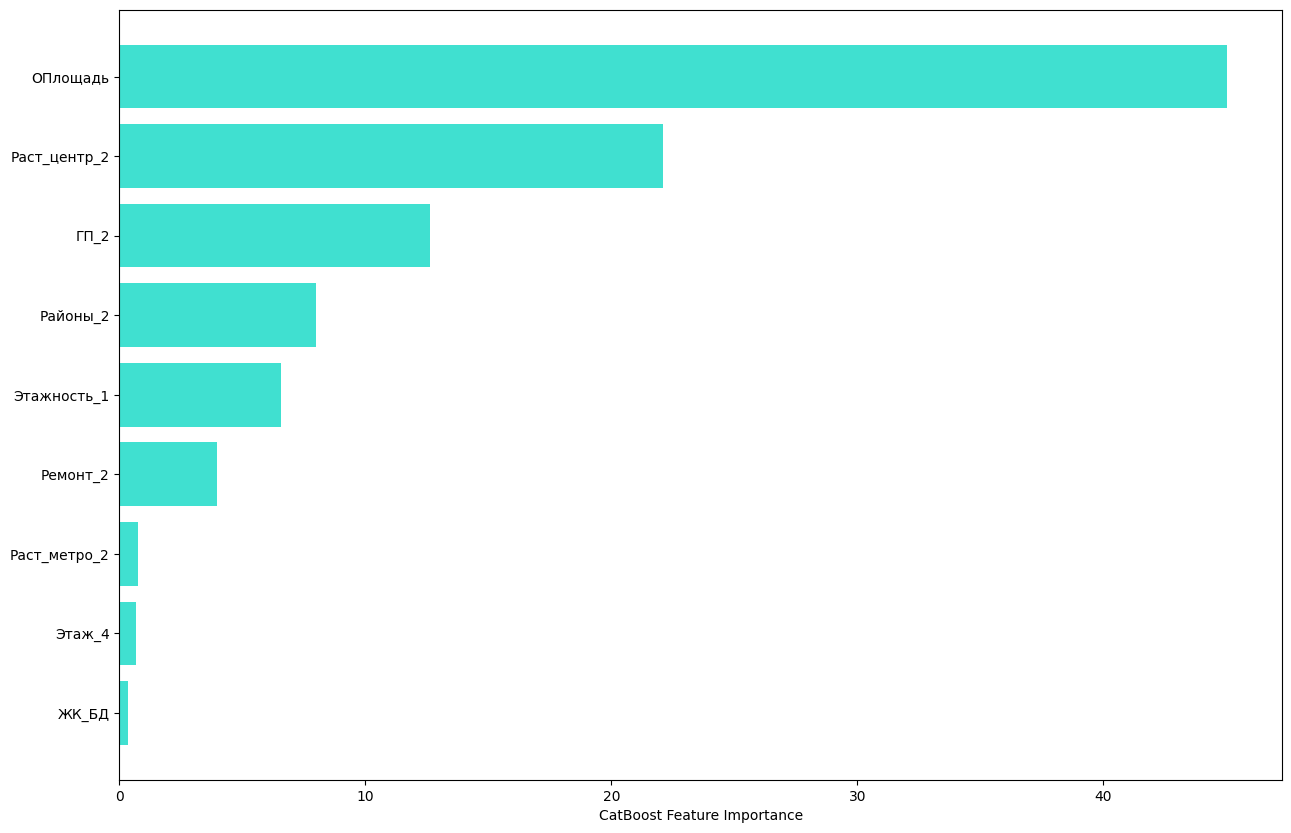

In [10]:
from sklearn.inspection import permutation_importance

feature_names = [
                   'ОПлощадь',
                    #'Этаж_1',
                    #'Этаж_2',
                    #'Этаж_3',
                    'Этаж_4',
                    'Этажность_1',
                    'ГП_2',
                    'Ремонт_2',
                    #'Долгота',
                    #'Широта',
                    #'Раст_центр_1',
                    'Раст_центр_2',
                    'Раст_метро_2',
                    'Районы_2',
                    'ЖК_БД'
                ]
features = np.array(feature_names)

sorted_feature_importance = catb.feature_importances_.argsort()
plt.figure(figsize = (15, 10))
plt.barh(features[sorted_feature_importance], 
         catb.feature_importances_[sorted_feature_importance], 
         color = 'turquoise')
plt.xlabel("CatBoost Feature Importance")

In [5]:
import pickle

pickle.dump(catb, open('catbmodel_kazan_ln_1.pkl', 'wb'))

NameError: name 'catb' is not defined

In [6]:
model_1 = pickle.load(open('catbmodel_kazan_ln_1.pkl', 'rb'))

In [20]:
print("MAE:", round(mae(np.array(df['Цена']), np.array(df['Прогноз'])), 4))
print("RMSE:", round(sqrt(mse(df['Цена'], df['Прогноз'])), 4))
print("MAPE:", round(mape(df['Цена'], df['Прогноз']), 4))
print("R2:", round(r2_score(df['Цена'], df['Прогноз']), 4))

MAE: 650066.007
RMSE: 1029272.1708
MAPE: 0.0753
R2: 0.9581


In [ ]:
MAE на обучении: 739333.9816
RMSE на обучении: 1271974.4235
MAPE на обучении: 0.0815
R2 на обучении: 0.9438
===============================
MAE на тесте: 855754.037
RMSE на тесте: 1534878.1081
MAPE на тесте: 0.0929
R2 на тесте: 0.9201
===============================
MAE: 756803.9362
RMSE: 1314782.3943
MAPE: 0.0832
R2: 0.9401

# Модель новая

In [36]:
X = df[[
            'ОПлощадь',
            #'Этаж_1',
            #'Этаж_2',
            #'Этаж_3',
            'Этаж_4',
            'Этажность_1',
            'ГП_2',
            'Ремонт_2',
            #'Долгота',
            #'Широта',
            #'Раст_центр_1',
            'Раст_центр_2',
            'Раст_метро_2',
            'Районы_2',
            'ЖК_БД'
      ]]

Y = df['LN(Цена)']
#Y = df['BC(Цена)']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[1, 4, 5, 6, 7, 8]


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 589039.4532
RMSE на обучении: 913360.2846
MAPE на обучении: 0.0686
R2 на обучении: 0.9658
MAE на тесте: 647005.1719
RMSE на тесте: 1032928.9576
MAPE на тесте: 0.0777
R2 на тесте: 0.9527
MAE: 597735.2263
RMSE: 932275.6929
MAPE: 0.07
R2: 0.9639


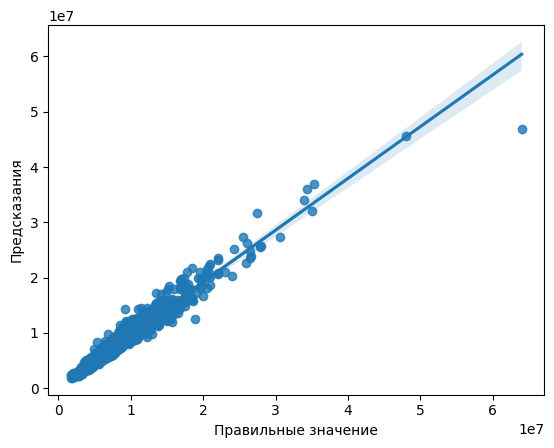

In [38]:
catb = CatBoostRegressor(iterations = 7000, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 6, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 40, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 5) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(x = np.exp(Y_test), y = pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [ ]:
MAE на обучении: 605427.0324
RMSE на обучении: 942095.9907
MAPE на обучении: 0.0704
R2 на обучении: 0.9646
===============================
MAE на тесте: 639375.8638
RMSE на тесте: 955822.2822
MAPE на тесте: 0.0775
R2 на тесте: 0.9512
===============================
MAE: 610521.3219
RMSE: 944168.4544
MAPE: 0.0715
R2: 0.963

Text(0.5, 0, 'CatBoost Feature Importance')

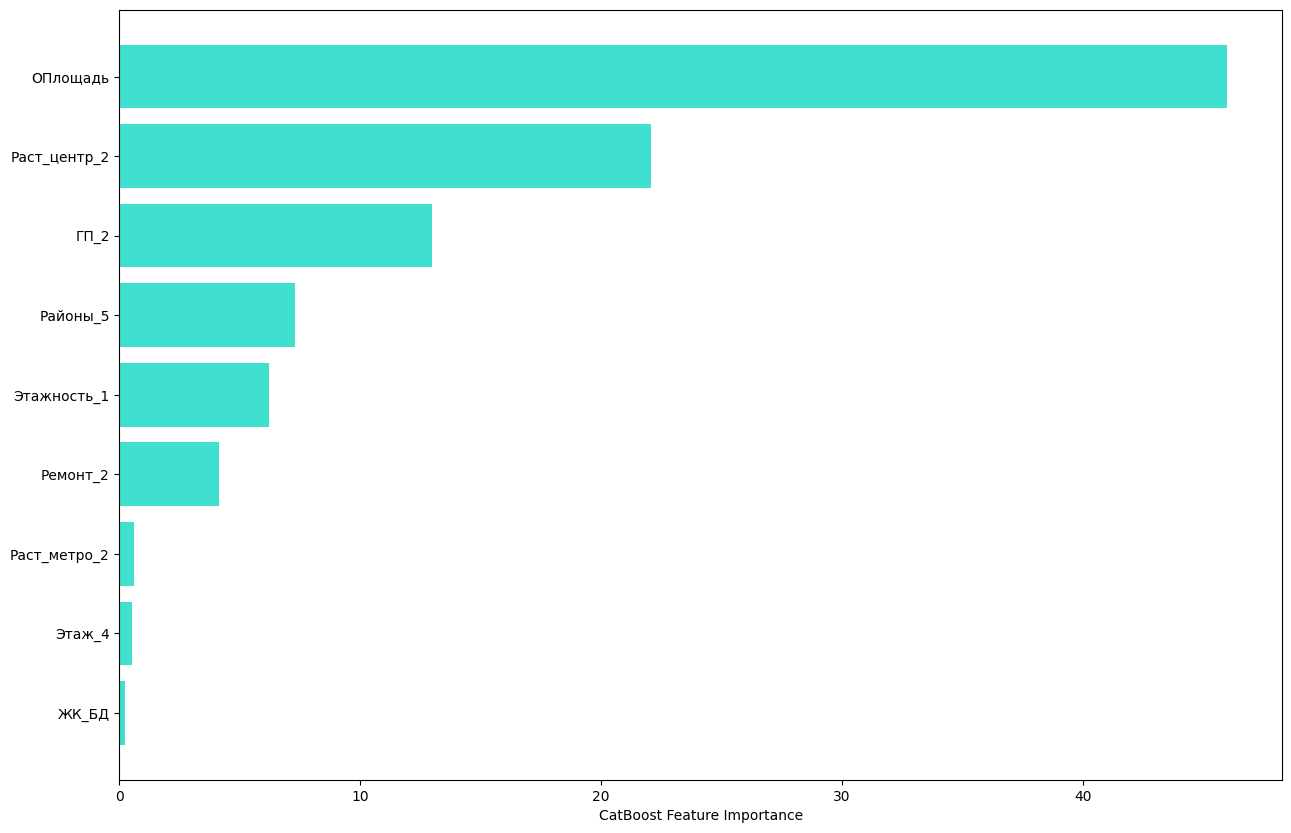

In [39]:
from sklearn.inspection import permutation_importance

feature_names = [
                   'ОПлощадь',
                    #'Этаж_1',
                    #'Этаж_2',
                    #'Этаж_3',
                    'Этаж_4',
                    'Этажность_1',
                    'ГП_2',
                    'Ремонт_2',
                    #'Долгота',
                    #'Широта',
                    #'Раст_центр_1',
                    'Раст_центр_2',
                    'Раст_метро_2',
                    'Районы_5',
                    'ЖК_БД'
                ]
features = np.array(feature_names)

sorted_feature_importance = catb.feature_importances_.argsort()
plt.figure(figsize = (15, 10))
plt.barh(features[sorted_feature_importance], 
         catb.feature_importances_[sorted_feature_importance], 
         color = 'turquoise')
plt.xlabel("CatBoost Feature Importance")

In [40]:
import pickle

pickle.dump(catb, open('catbmodel_kazan_ln_2.pkl', 'wb'))

In [41]:
pred = pd.DataFrame(pred_1, columns = ['Прогноз_2'])
pred['ID'] = df['ID']
pred

,Прогноз_2,ID
0,5.356002e+06,1_avito
1,5.599192e+06,2_avito
2,9.022312e+06,3_avito
3,5.722026e+06,4_avito
4,8.525873e+06,5_avito
...,...,...
9494,1.440933e+07,9389_avito
9495,9.606342e+06,9390_avito
9496,1.001789e+07,9391_avito
9497,9.650176e+06,9392_avito


In [42]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Казань_прогноз_ln_2.xlsx')
pred.to_excel(writer, 'прогноз')
writer._save()

C:\Users\Silm\AppData\Local\Temp\ipykernel_2668\1991603591.py:3: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  pred.to_excel(writer, 'прогноз')


In [43]:
metrics = []

for distr in X['Районы_2'].unique():
    pred_1 = np.exp(catb.predict(X[X['Районы_2'] == distr]))

    Y = df[df['Районы_2'] == distr]['LN(Цена)']
    
    MAE = round(mae(np.exp(Y), pred_1), 4)
    RMSE = round(sqrt(mse(np.exp(Y), pred_1)), 4)
    MAPE = round(mape(np.exp(Y), pred_1), 4)
    R2 = round(r2_score(np.exp(Y), pred_1), 4)

    metrics.append([distr, MAE, RMSE, MAPE, R2])
    
pd.DataFrame(metrics, columns = ['Районы', 'MAE', 'RMSE', 'MAPE', 'R2']).sort_values('RMSE', ascending = False)

,Районы,MAE,RMSE,MAPE,R2
24,Центр,1.512416e+06,2.338050e+06,0.0795,0.9653
11,Старотатарская_Суконная,1.345756e+06,1.970920e+06,0.0899,0.9534
21,Квартал_56_Третий,1.105178e+06,1.577058e+06,0.0800,0.9213
16,Ягодная_слобода,7.928084e+05,1.092857e+06,0.0826,0.9594
7,Калуга_Аметьево,7.815915e+05,1.084164e+06,0.0741,0.9585
4,Вблизи_центра,6.793418e+05,1.042820e+06,0.0738,0.9181
13,Зоопарк,6.615166e+05,9.702166e+05,0.0775,0.9662
31,Адмиралтейская_слобода,6.291592e+05,9.256825e+05,0.0896,0.9285
6,Горки,6.428134e+05,9.066666e+05,0.0749,0.9327
2,Клыковка_Дальний,5.566570e+05,8.321597e+05,0.0540,0.9557


In [22]:
metrics = []

for distr in X['Районы_2'].unique():
    pred_1 = np.exp(catb.predict(X[X['Районы_2'] == distr]))

    Y = df[df['Районы_2'] == distr]['LN(Цена)']
    
    MAE = round(mae(np.exp(Y), pred_1), 4)
    RMSE = round(sqrt(mse(np.exp(Y), pred_1)), 4)
    MAPE = round(mape(np.exp(Y), pred_1), 4)
    R2 = round(r2_score(np.exp(Y), pred_1), 4)

    metrics.append([distr, MAE, RMSE, MAPE, R2])
    
pd.DataFrame(metrics, columns = ['Районы', 'MAE', 'RMSE', 'MAPE', 'R2']).sort_values('RMSE', ascending = False)

,Районы,MAE,RMSE,MAPE,R2
24,Центр,2.347307e+06,3.722639e+06,0.1070,0.9257
11,Старотатарская_Суконная,1.873007e+06,2.926685e+06,0.1128,0.9036
19,Квартал_56_Третий,1.474496e+06,2.171751e+06,0.0998,0.8769
13,Зоопарк,9.824217e+05,1.770774e+06,0.0973,0.9264
7,Калуга_Аметьево,1.134102e+06,1.646364e+06,0.0972,0.9094
16,Ягодная_слобода,1.046814e+06,1.499778e+06,0.0994,0.9456
4,Вблизи_центра,8.546896e+05,1.362100e+06,0.0898,0.8716
6,Горки,7.887980e+05,1.247719e+06,0.0869,0.8901
27,Речной_Порт,7.316605e+05,1.234989e+06,0.0945,0.9145
21,Танкодром,7.040448e+05,1.145051e+06,0.0725,0.9241


# Модель вариант 3 после графического анализа выбросов

In [20]:
X = df[[
            'ОПлощадь',
            #'Этаж_1',
            #'Этаж_2',
            #'Этаж_3',
            'Этаж_4',
            'Этажность_1',
            'ГП_2',
            'Ремонт_2',
            #'Долгота',
            #'Широта',
            #'Раст_центр_1',
            'Раст_центр_2',
            'Раст_метро_2',
            'Районы_2',
            'ЖК_БД'
      ]]

Y = df['LN(Цена)']
#Y = df['BC(Цена)']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[1, 4, 5, 6, 7, 8]


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 592905.4472
RMSE на обучении: 899886.939
MAPE на обучении: 0.0698
R2 на обучении: 0.9667
MAE на тесте: 653372.2713
RMSE на тесте: 1062129.2437
MAPE на тесте: 0.0772
R2 на тесте: 0.9468
MAE: 601978.6567
RMSE: 926046.2075
MAPE: 0.0709
R2: 0.964


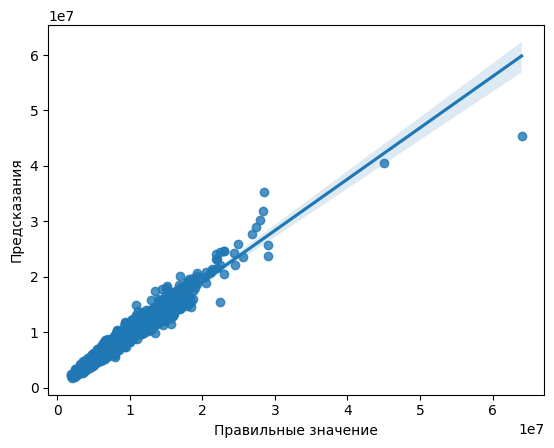

In [22]:
catb = CatBoostRegressor(iterations = 7000, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 6, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 40, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 5) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(x = np.exp(Y_test), y = pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [ ]:
MAE на обучении: 605427.0324
RMSE на обучении: 942095.9907
MAPE на обучении: 0.0704
R2 на обучении: 0.9646
===============================
MAE на тесте: 639375.8638
RMSE на тесте: 955822.2822
MAPE на тесте: 0.0775
R2 на тесте: 0.9512
===============================
MAE: 610521.3219
RMSE: 944168.4544
MAPE: 0.0715
R2: 0.963

Text(0.5, 0, 'CatBoost Feature Importance')

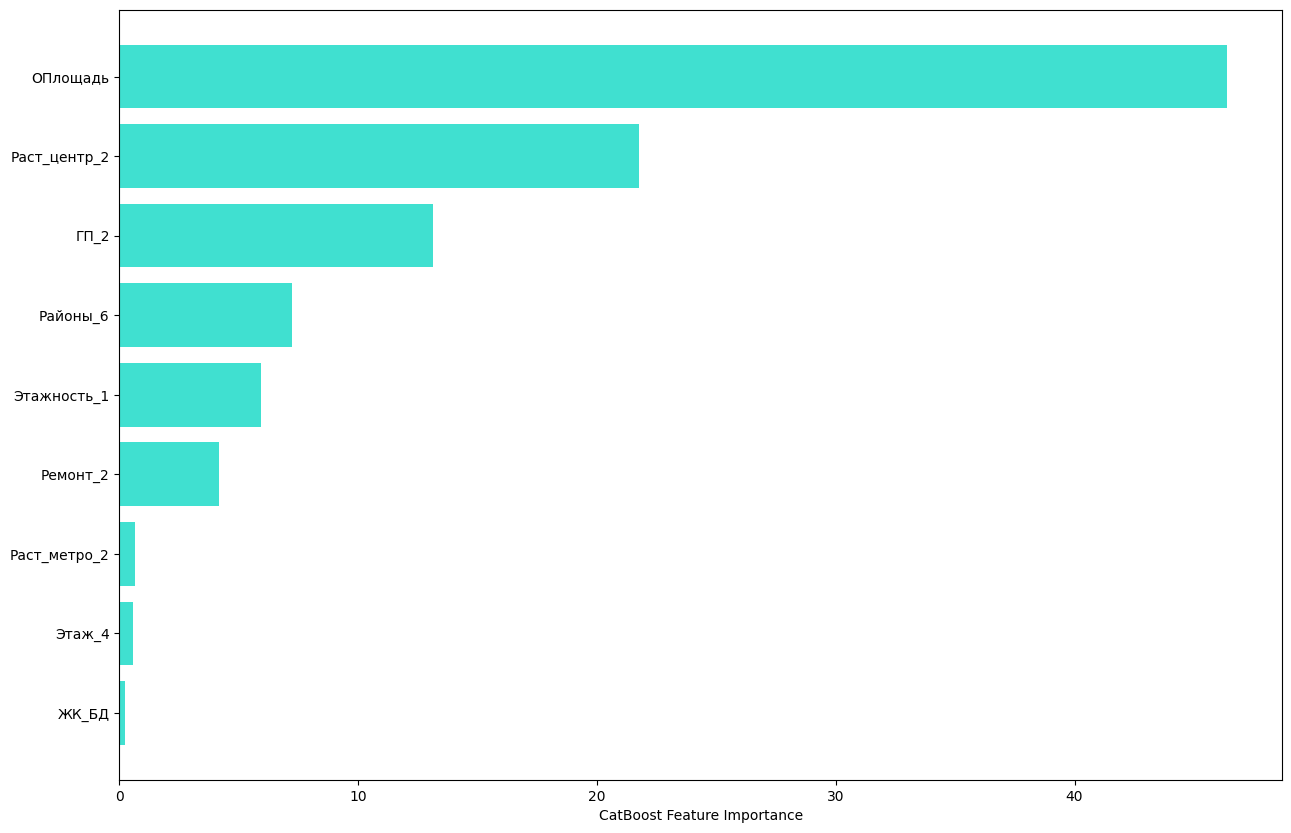

In [23]:
from sklearn.inspection import permutation_importance

feature_names = [
                   'ОПлощадь',
                    #'Этаж_1',
                    #'Этаж_2',
                    #'Этаж_3',
                    'Этаж_4',
                    'Этажность_1',
                    'ГП_2',
                    'Ремонт_2',
                    #'Долгота',
                    #'Широта',
                    #'Раст_центр_1',
                    'Раст_центр_2',
                    'Раст_метро_2',
                    'Районы_6',
                    'ЖК_БД'
                ]
features = np.array(feature_names)

sorted_feature_importance = catb.feature_importances_.argsort()
plt.figure(figsize = (15, 10))
plt.barh(features[sorted_feature_importance], 
         catb.feature_importances_[sorted_feature_importance], 
         color = 'turquoise')
plt.xlabel("CatBoost Feature Importance")

# Модель с Районом_6

In [5]:
X = df[[
            'ОПлощадь',
            #'Этаж_1',
            #'Этаж_2',
            #'Этаж_3',
            'Этаж_4',
            'Этажность_1',
            'ГП_2',
            'Ремонт_2',
            #'Долгота',
            #'Широта',
            #'Раст_центр_1',
            'Раст_центр_2',
            'Раст_метро_2',
            'Районы_6',
            'ЖК_БД'
      ]]

Y = df['LN(Цена)']
#Y = df['BC(Цена)']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[1, 4, 5, 6, 8]


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 674458.5636
RMSE на обучении: 1045684.747
MAPE на обучении: 0.0787
R2 на обучении: 0.9564
MAE на тесте: 688836.7821
RMSE на тесте: 1019790.3531
MAPE на тесте: 0.0833
R2 на тесте: 0.9444
MAE: 676616.1285
RMSE: 1041840.132
MAPE: 0.0794
R2: 0.955


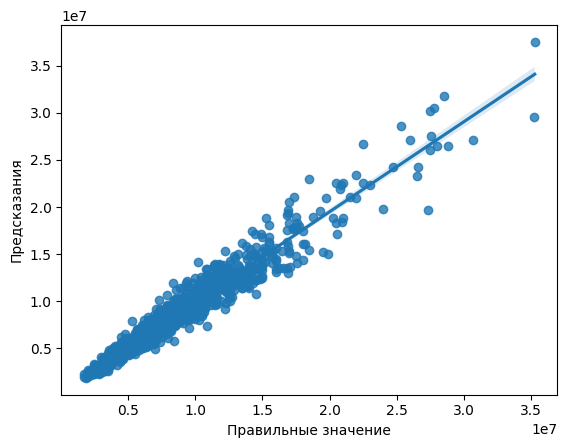

In [7]:
catb = CatBoostRegressor(iterations = 7000, #максимальное количество построенных деревьев
                         random_seed = 5, 
                         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 6, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 40, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 5) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(x = np.exp(Y_test), y = pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [ ]:
MAE на обучении: 605427.0324
RMSE на обучении: 942095.9907
MAPE на обучении: 0.0704
R2 на обучении: 0.9646
===============================
MAE на тесте: 639375.8638
RMSE на тесте: 955822.2822
MAPE на тесте: 0.0775
R2 на тесте: 0.9512
===============================
MAE: 610521.3219
RMSE: 944168.4544
MAPE: 0.0715
R2: 0.963

Text(0.5, 0, 'CatBoost Feature Importance')

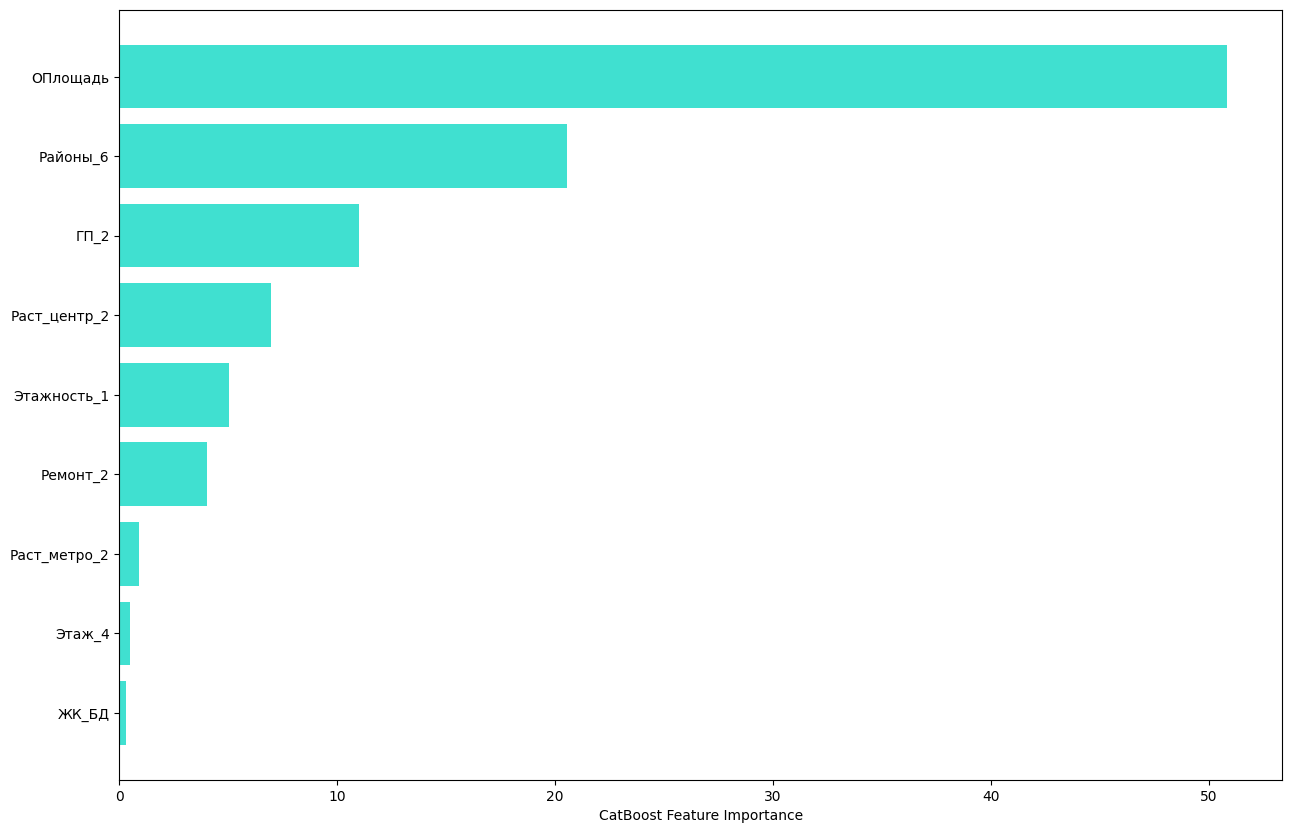

In [8]:
from sklearn.inspection import permutation_importance

feature_names = [
                   'ОПлощадь',
                    #'Этаж_1',
                    #'Этаж_2',
                    #'Этаж_3',
                    'Этаж_4',
                    'Этажность_1',
                    'ГП_2',
                    'Ремонт_2',
                    #'Долгота',
                    #'Широта',
                    #'Раст_центр_1',
                    'Раст_центр_2',
                    'Раст_метро_2',
                    'Районы_6',
                    'ЖК_БД'
                ]
features = np.array(feature_names)

sorted_feature_importance = catb.feature_importances_.argsort()
plt.figure(figsize = (15, 10))
plt.barh(features[sorted_feature_importance], 
         catb.feature_importances_[sorted_feature_importance], 
         color = 'turquoise')
plt.xlabel("CatBoost Feature Importance")

In [25]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
import pickle

In [44]:
model_1 = pickle.load(open('catbmodel_kazan_ln_2.pkl', 'rb'))

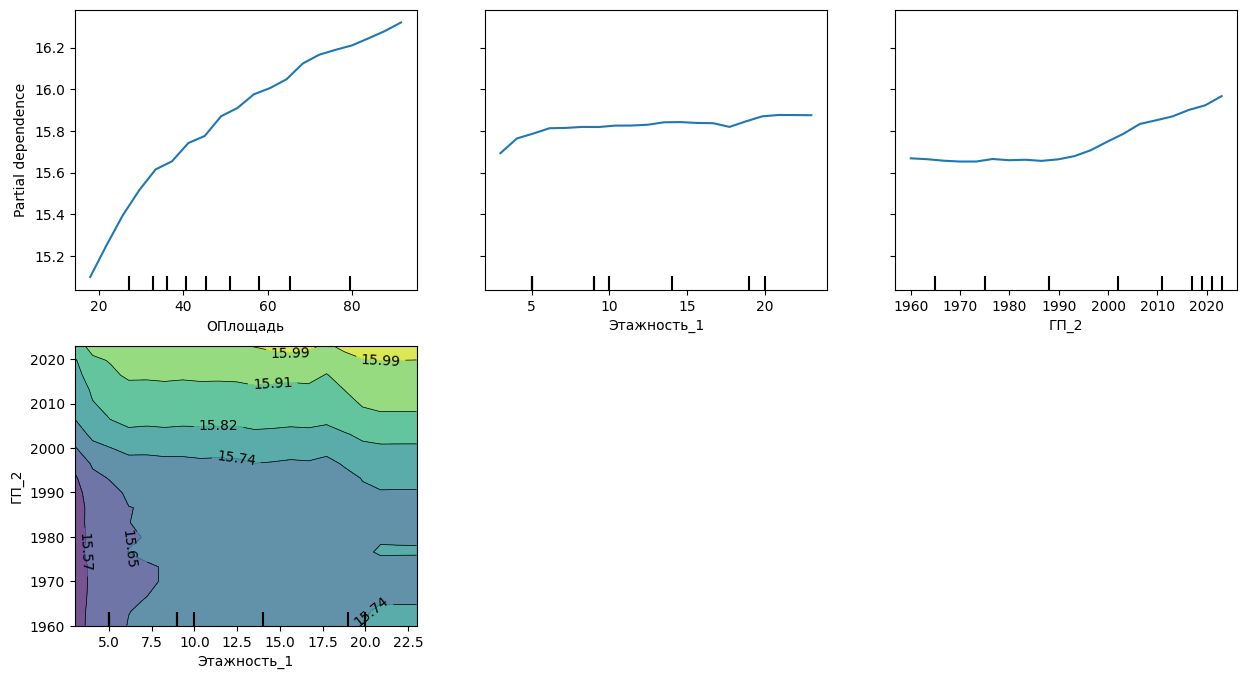

In [51]:
feature = [
           'ОПлощадь', 
           'Этажность_1',
           'ГП_2',
           ('Этажность_1', 'ГП_2')
          ]

fig, ax = plt.subplots(figsize = (15, 8))

PartialDependenceDisplay.from_estimator(model_1, 
                                        X_test, 
                                        feature, 
                                        grid_resolution = 20, 
                                        ax = ax
                                       )

In [49]:
f = X_test[['Этажность_1', 'ГП_2']]
f

,Этажность_1,ГП_2
3054,9.0,1987.0
5109,16.0,2011.0
5642,5.0,1963.0
1098,19.0,2011.0
7670,5.0,1976.0
...,...,...
8716,9.0,1990.0
722,19.0,2018.0
3051,14.0,1978.0
6312,21.0,2024.0


Text(0, 0.5, 'LN_Цена')

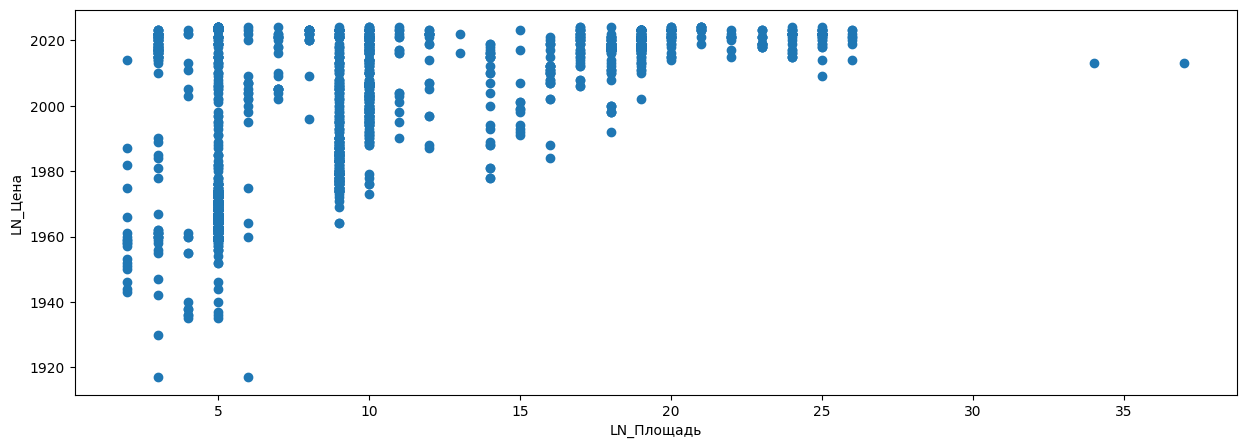

In [50]:
plt.figure(figsize = (15, 5))
plt.scatter(f['Этажность_1'], f['ГП_2'])
plt.xlabel('LN_Площадь')
plt.ylabel('LN_Цена')

# Анализ ошибок

In [55]:
def graph(data):
    #data = df_isofor
    fig = plt.figure(figsize = (20, 25))
    fig.subplots_adjust(hspace = 0.5)
    #left=None, bottom=None, right=None, top=None, wspace=None, hspace=None

    plt.subplot(5, 3, 1)
    f1 = sns.histplot(x = 'ОПлощадь',
                      #hue = 'credit_risk',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      data = data
                      )
    #f1.set(xlabel = None)
    f1.set_xlabel('ОПлощадь', fontsize = 12)
    f1.set_ylabel('Count', fontsize = 12)

    plt.subplot(5, 3, 2)
    f2 = sns.histplot(x = 'Этажность_1',
                      #hue = 'credit_risk',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      data = data
                      )
    f2.set_xlabel('Этажность', fontsize = 12)
    #f2.set_ylabel('Count', fontsize = 12)
    f2.set(ylabel = None)

    plt.subplot(5, 3, 3)
    f3 = sns.histplot(x = 'ГП_2',
                      #hue = 'credit_risk',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      data = data
                      )
    #f1.set(xlabel = None)
    f3.set_xlabel('Год постройки', fontsize = 12)
    #f3.set_ylabel('Count', fontsize = 12)
    f3.set(ylabel = None)

    plt.subplot(5, 3, 4)
    f4 = sns.histplot(x = 'Этаж_4',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f4.set_xlabel('Этаж_4', fontsize = 12)
    plt.xticks(rotation = 30)
    f4.set_ylabel('Count', fontsize = 12)

    plt.subplot(5, 3, 5)
    f5 = sns.histplot(x = 'Ремонт_2',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f5.set_xlabel('Ремонт', fontsize = 10)
    plt.xticks(rotation = 30)
    #f5.set_ylabel('Count', fontsize = 10)
    f5.set(ylabel = None)

    plt.subplot(5, 3, 6)
    f6 = sns.histplot(x = 'Этаж_2',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f6.set_xlabel('Этаж_2', fontsize = 10)
    #plt.xticks(rotation = 30)
    #f6.set_ylabel('Count', fontsize = 10)
    f6.set(ylabel = None)

    plt.subplot(5, 3, 7)
    f7 = sns.histplot(x = 'Районы_4',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f7.set_xlabel('Районы_4', fontsize = 10)
    #plt.xticks(rotation = 30)
    f7.set_ylabel('Count', fontsize = 10)

    plt.subplot(5, 3, 8)
    f8 = sns.histplot(x = 'Районы_5',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f8.set_xlabel('Районы_4', fontsize = 10)
    #plt.xticks(rotation = 30)
    #f8.set_ylabel('Count', fontsize = 10)
    f8.set(ylabel = None)

    plt.subplot(5, 3, 9)
    f9 = sns.histplot(x = 'ЖК_БД',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f9.set_xlabel('Статус ЖК', fontsize = 10)
    #plt.xticks(rotation = 30)
    #f9.set_ylabel('Count', fontsize = 10)
    f9.set(ylabel = None)

    plt.subplot(5, 2, 7) #7 из расчета, что в одну страку входит 2 графика
    f10 = sns.histplot(x = 'Раст_центр_2',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f10.set_xlabel('Раст до центр', fontsize = 10)
    plt.xticks(rotation = 30)
    #f10.set_ylabel('Count', fontsize = 10)
    #f10.set(ylabel = None)

    plt.subplot(5, 2, 8) #8 из расчета, что в одну страку входит 2 графика
    f11 = sns.histplot(x = 'Раст_метро_2',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f11.set_xlabel('Раст до метро', fontsize = 10)
    plt.xticks(rotation = 30)
    #f11.set_ylabel('Count', fontsize = 10)
    f11.set(ylabel = None)

    plt.subplot(5, 1, 5) #5 из расчета, что в одну страку входит 1 график
    f11 = sns.histplot(x = 'Районы_2',
                      #multiple = 'dodge',
                      color = 'b',
                      #bins = 11,
                      #element = "step",
                      alpha = 0.3,
                      shrink = 0.8,
                      data = data
                      )
    f11.set_xlabel('Район', fontsize = 10)
    plt.xticks(rotation = 30)
    #f11.set_ylabel('Count', fontsize = 10)
    f11.set(ylabel = None)

    #fig.tight_layout(pad = 1)

    # fig.legend([f1, f2, f3],
    #            labels = label_list,
    #            loc = 'upper right',
    #            borderaxespad = 0.1,
    #            fontsize = 10
    #           )

    return plt.show()

In [56]:
g = 2000000
df_1 = df[(df['MAE'] < -g) | (df['MAE'] > g)]
len(df_1)

422

<BarContainer object of 7 artists>

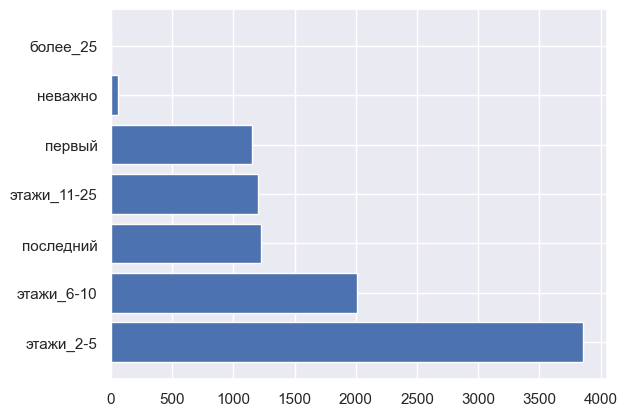

In [69]:
bar = pd.DataFrame(df['Этаж_4'].value_counts()).reset_index()
plt.barh(bar['Этаж_4'], bar['count'])

C:\Users\Silm\AppData\Local\Temp\ipykernel_2668\4086408034.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Этажность_1'])


<Axes: xlabel='Этажность_1', ylabel='Density'>

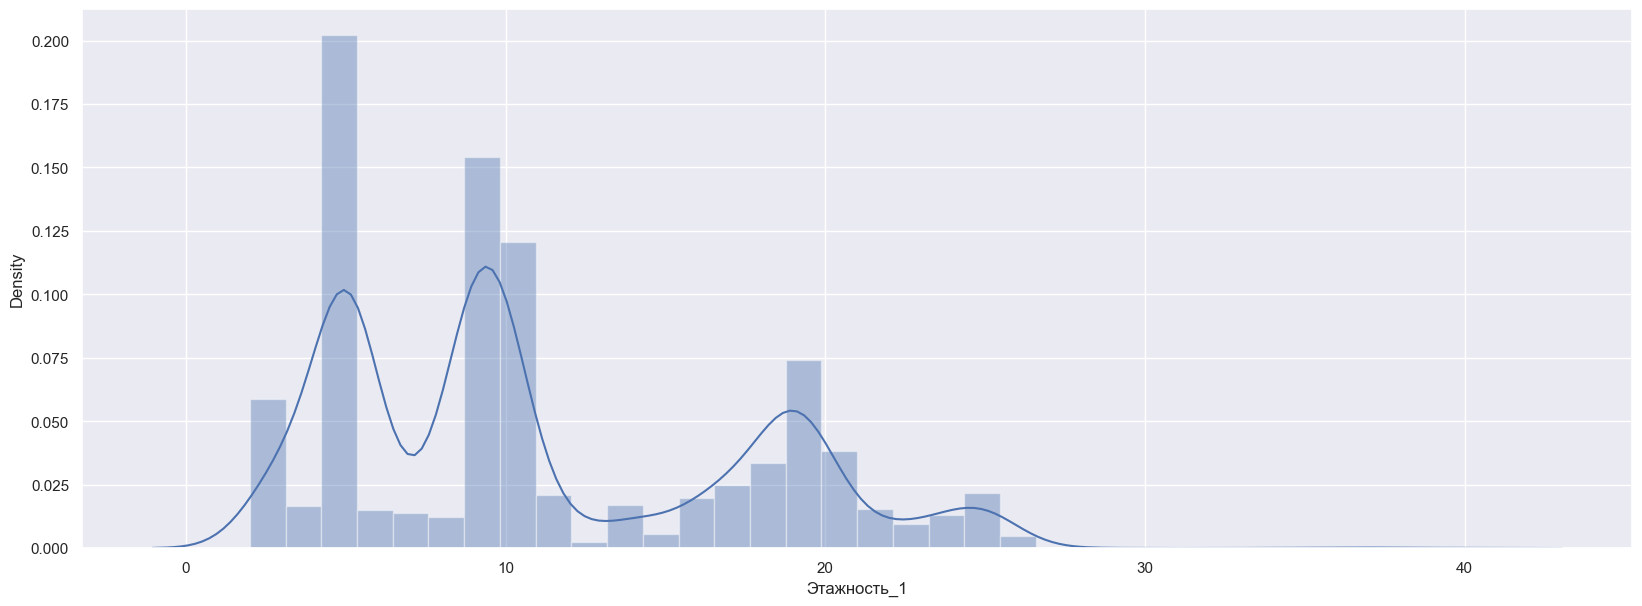

In [70]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['Этажность_1'])

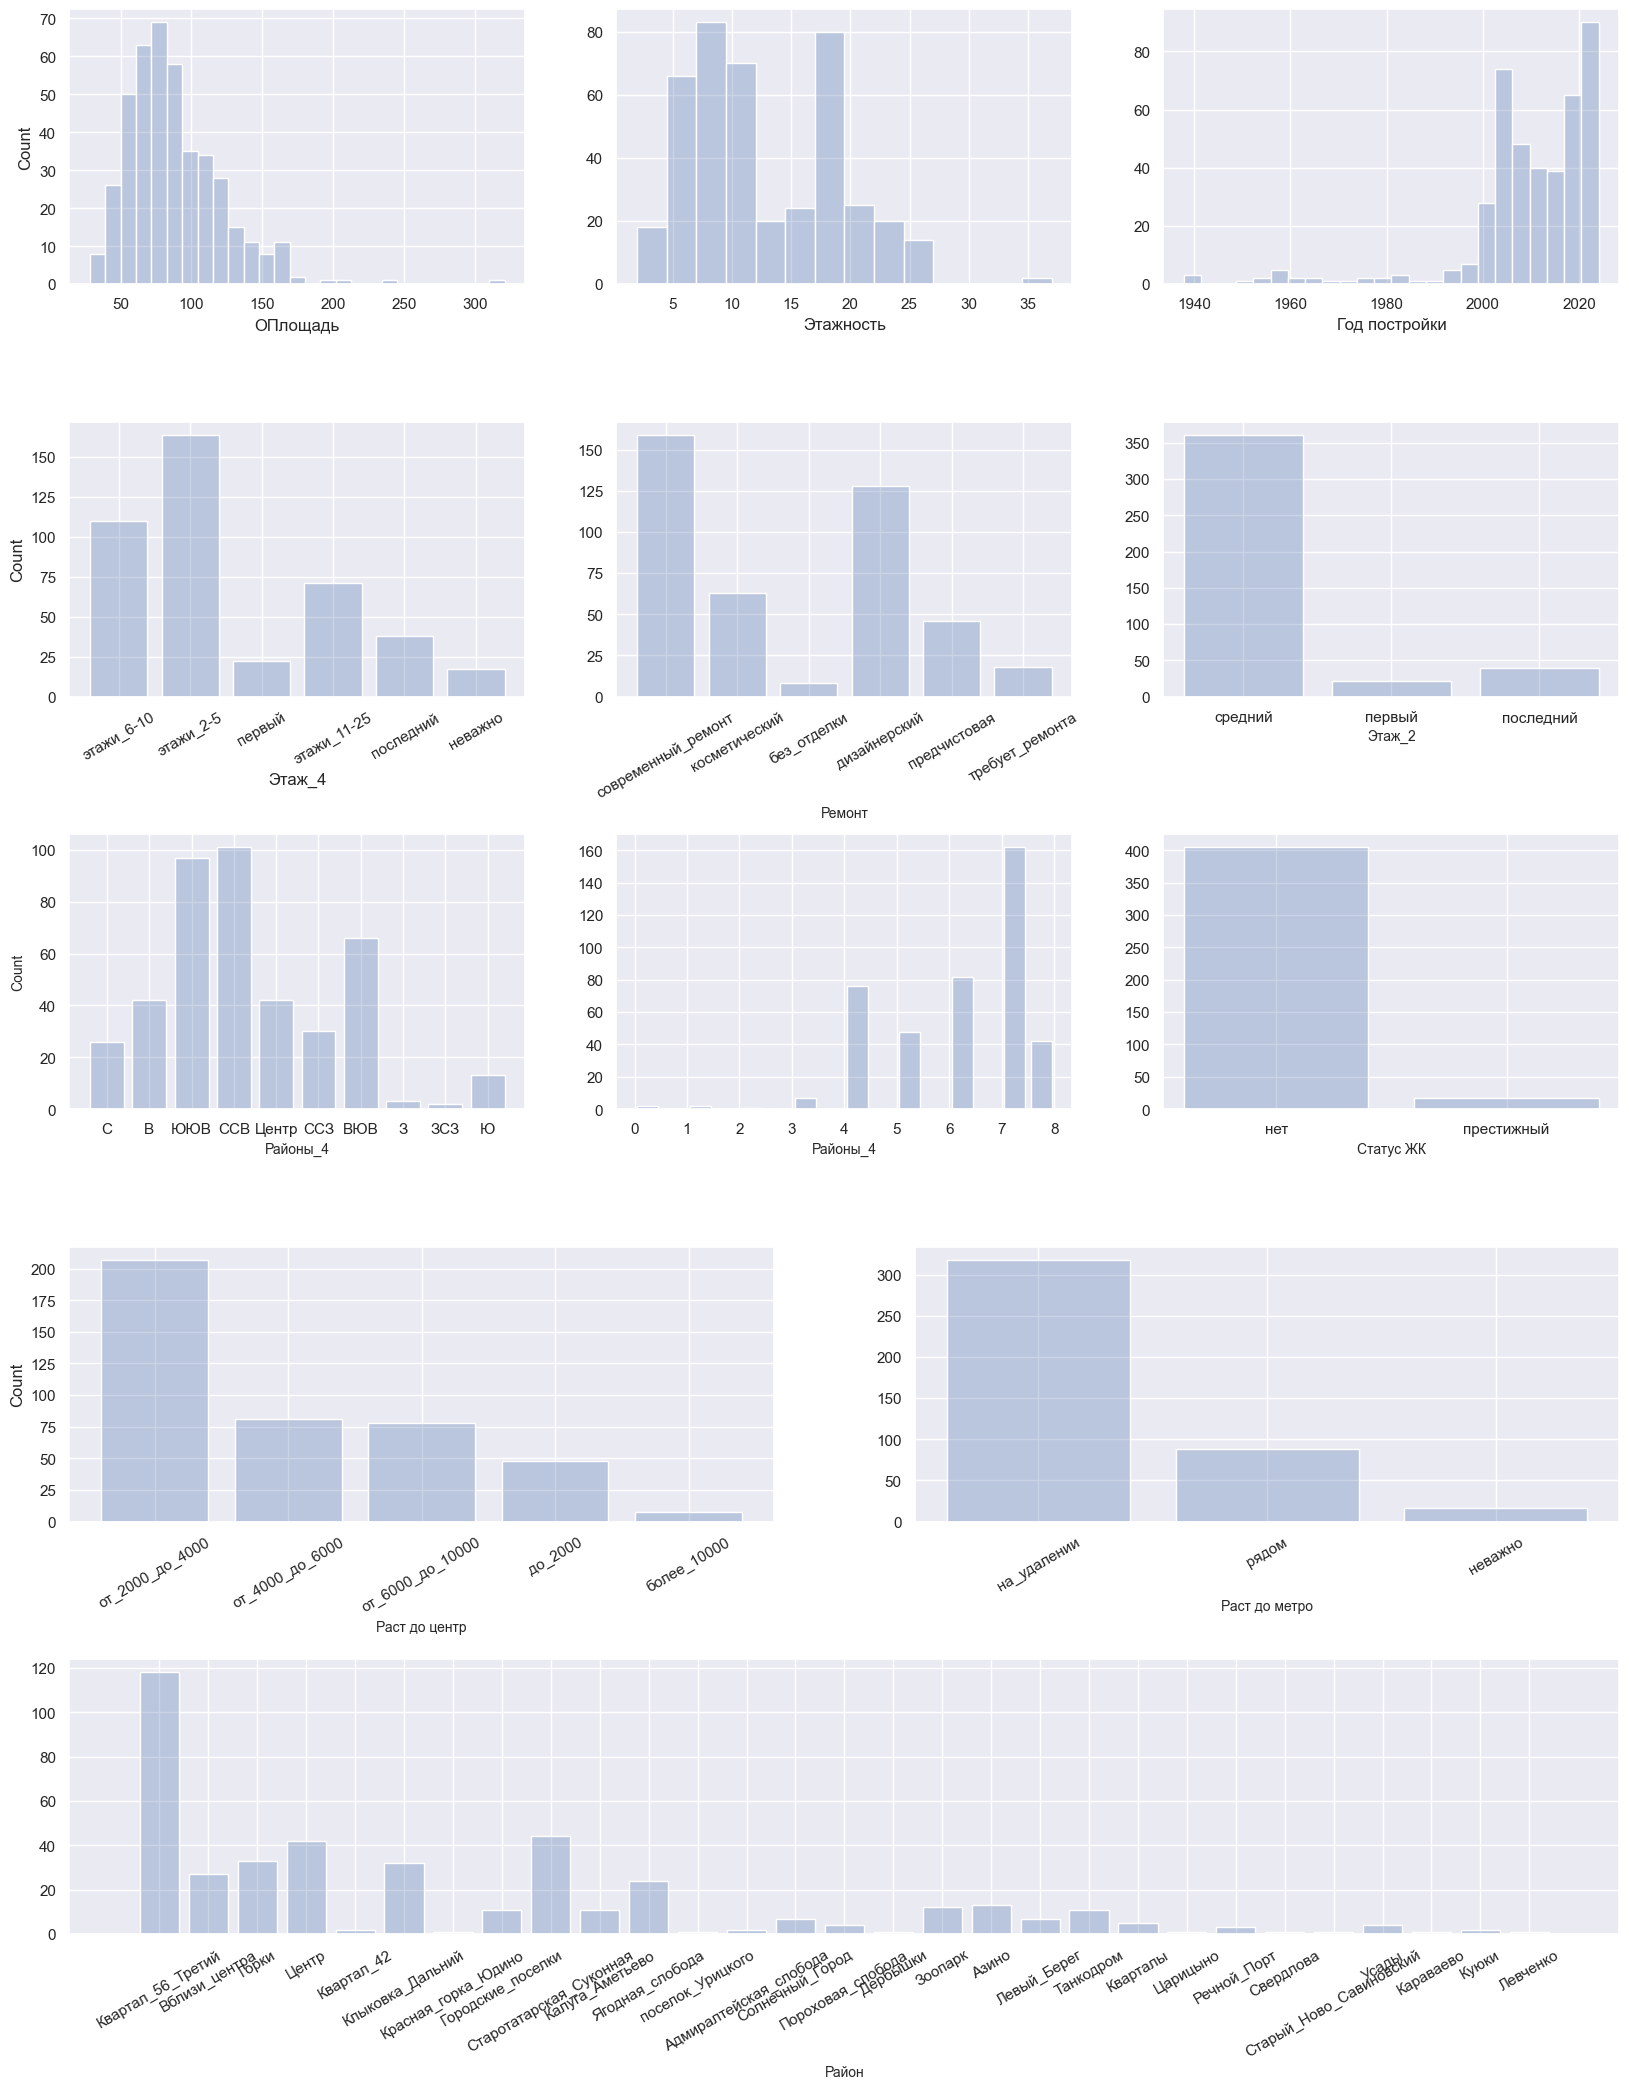

In [57]:
graph(df_1)

Всего: 9499
MAE (2 млн): 422
MAE (2 млн): 0.044


C:\Users\Silm\AppData\Local\Temp\ipykernel_2668\2915815488.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MAE'])


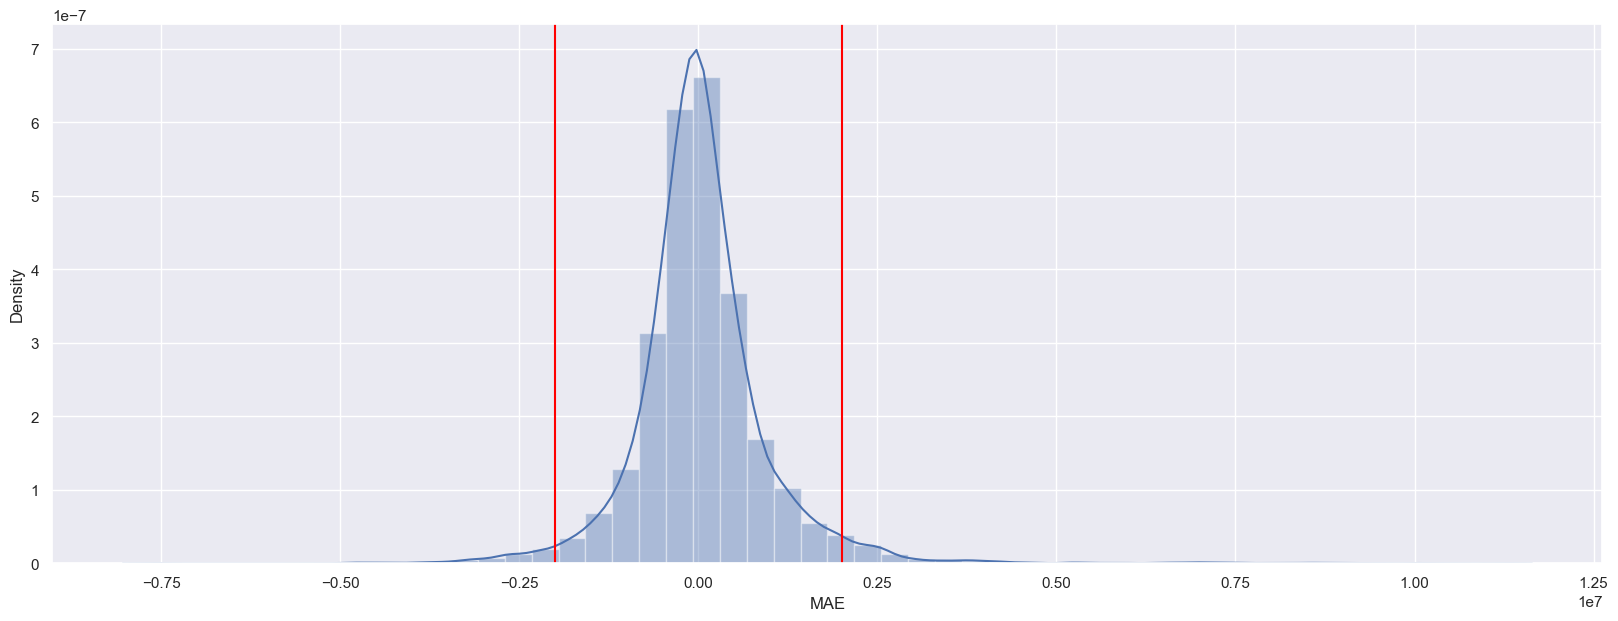

In [79]:
g = 2000000

print('Всего:', len(df['MAE']))
print('MAE (2 млн):', len(df[(df['MAE'] < -g) | (df['MAE'] > g)]))
print('MAE (2 млн):', round(len(df[(df['MAE'] < -g) | (df['MAE'] > g)]) / len(df['MAE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

Всего: 9499
MAPE 0.2: 287
MAPE 0.2: 0.03


C:\Users\Silm\AppData\Local\Temp\ipykernel_2668\1963461130.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MAPE'])


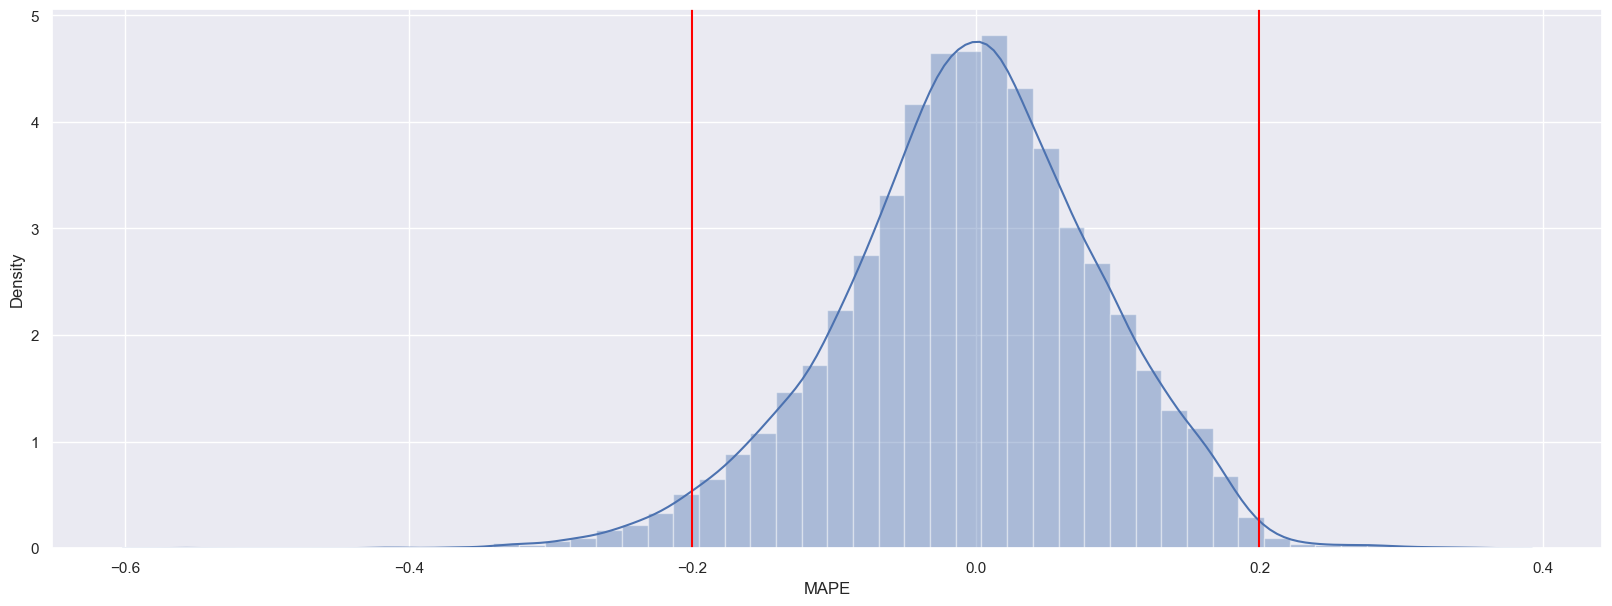

In [73]:
g = 0.2

print('Всего:', len(df['MAPE']))
print(f'MAPE {g}:', len(df[(df['MAPE'] < -g) | (df['MAPE'] > g)]))
print(f'MAPE {g}:', round(len(df[(df['MAPE'] < -g) | (df['MAPE'] > g)]) / len(df['MAPE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAPE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

In [74]:
df_3 = df[(df['MAE'] < -2000000) | (df['MAE'] > 2000000)]
df_3 = df_3[(df_3['MAPE'] < -0.2) | (df_3['MAPE'] > 0.2)]
len(df_3)

109

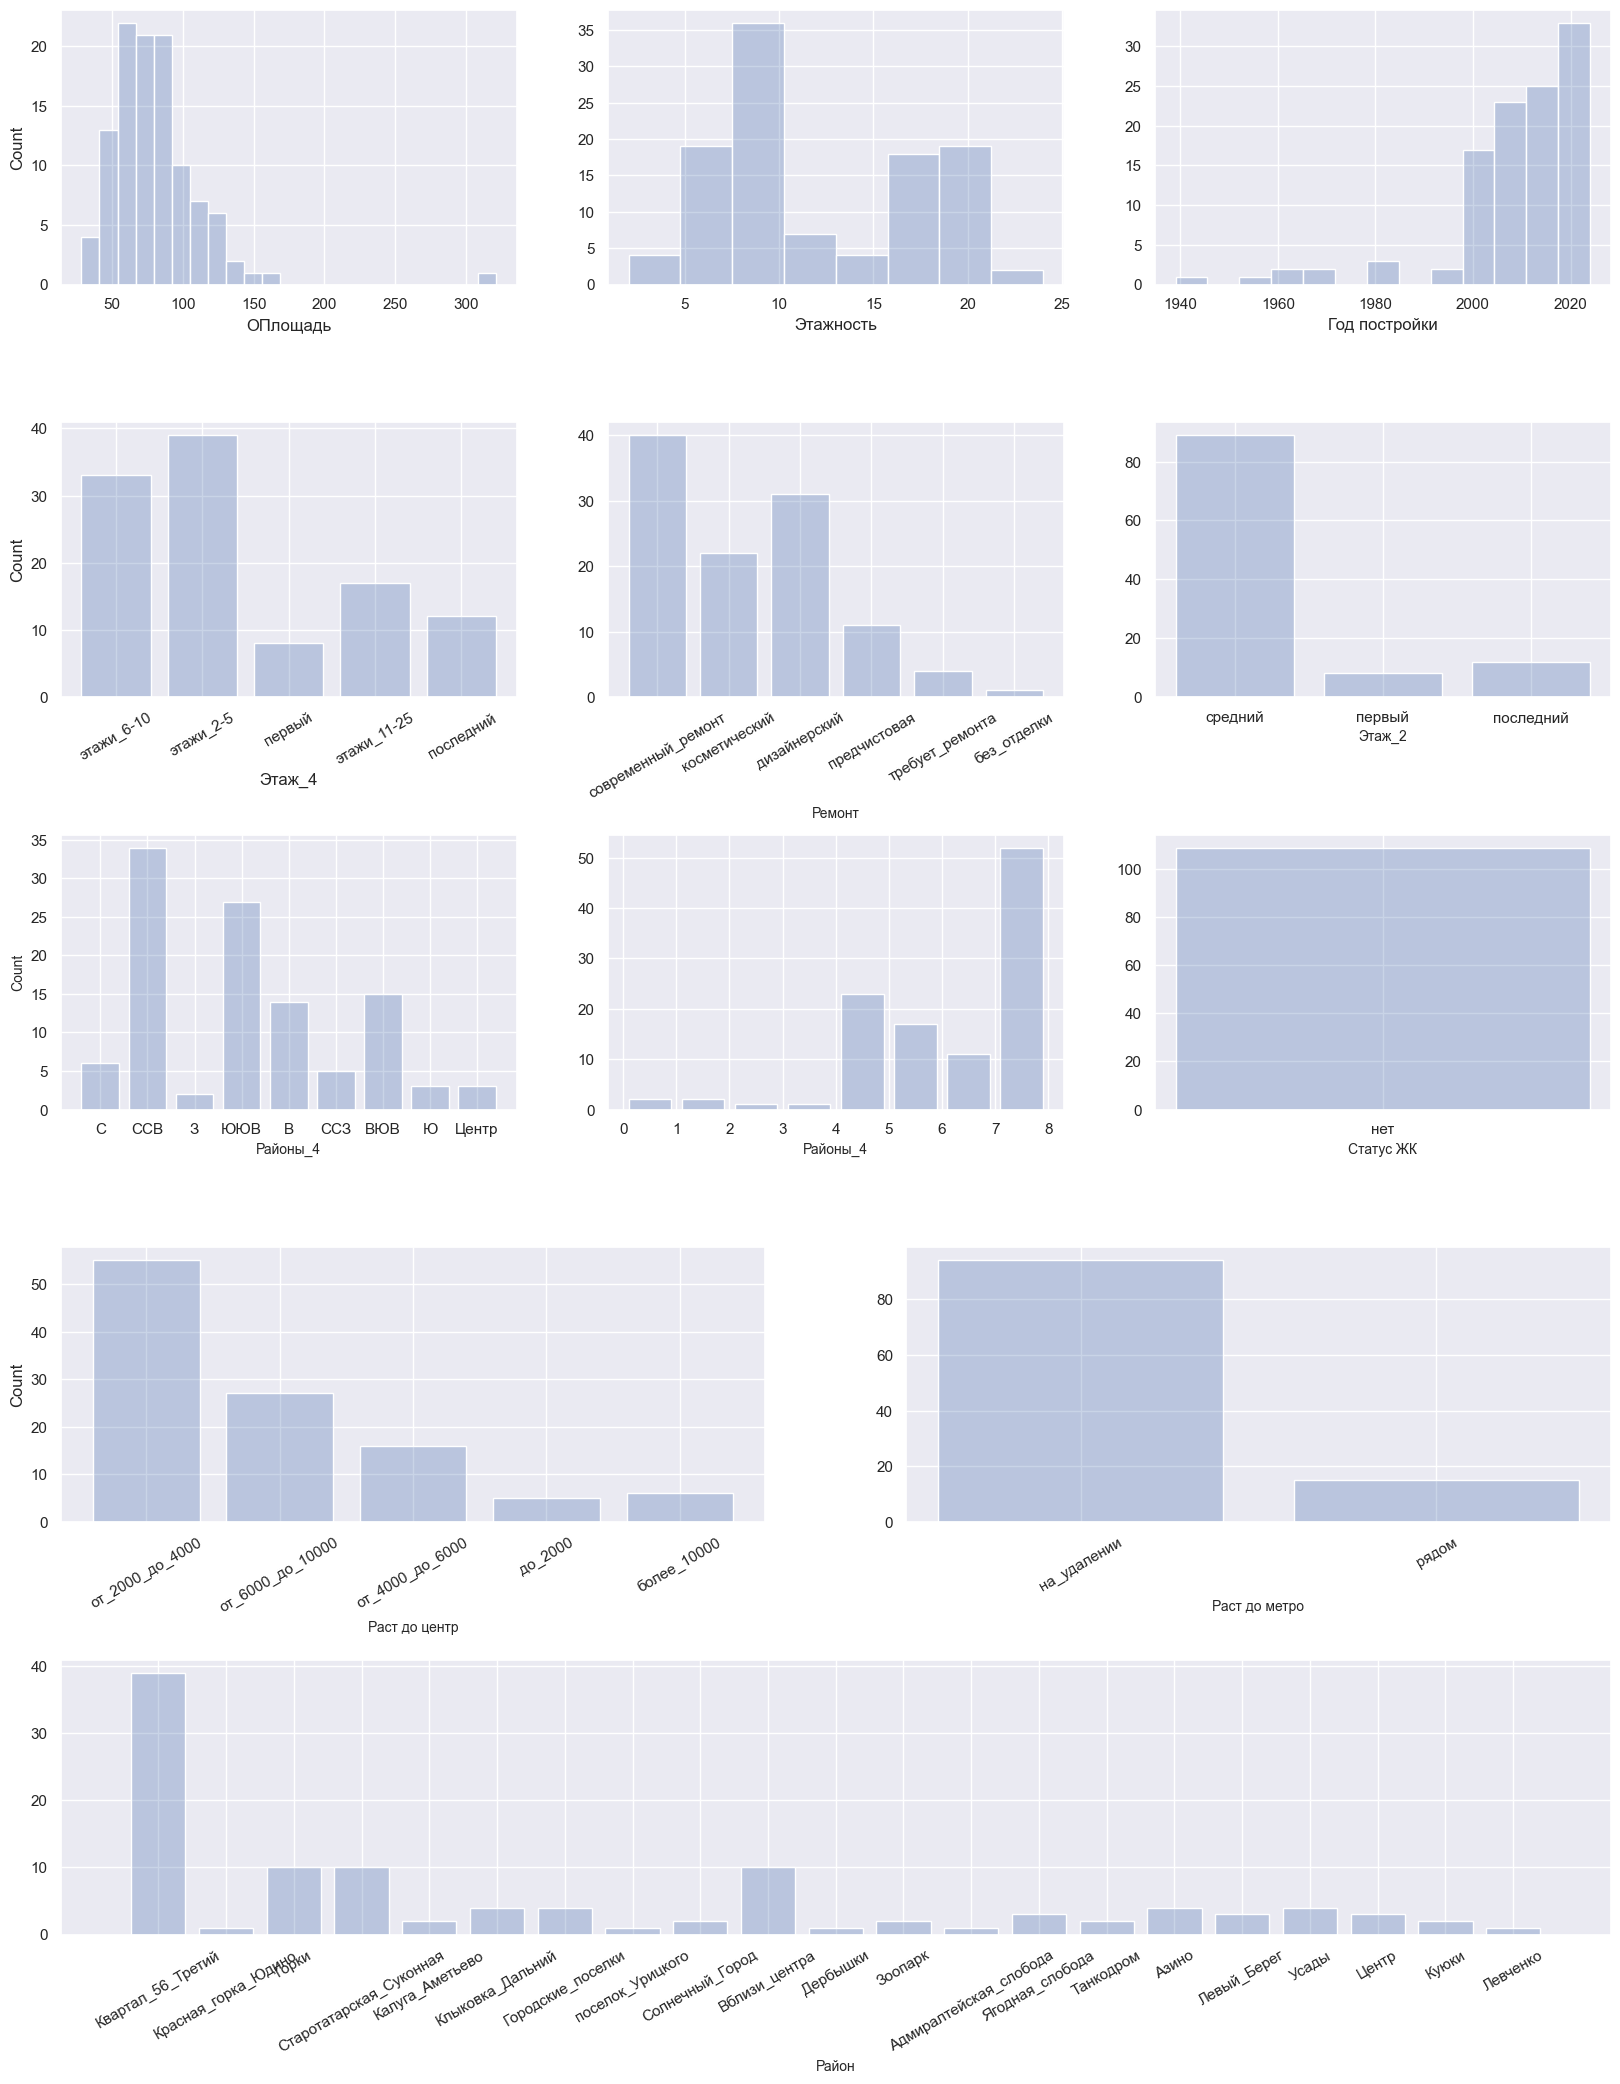

In [75]:
graph(df_3)

Всего: 54
MAE (2 млн): 17
MAE (2 млн): 0.315


C:\Users\Silm\AppData\Local\Temp\ipykernel_2668\3185831910.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MAE'])


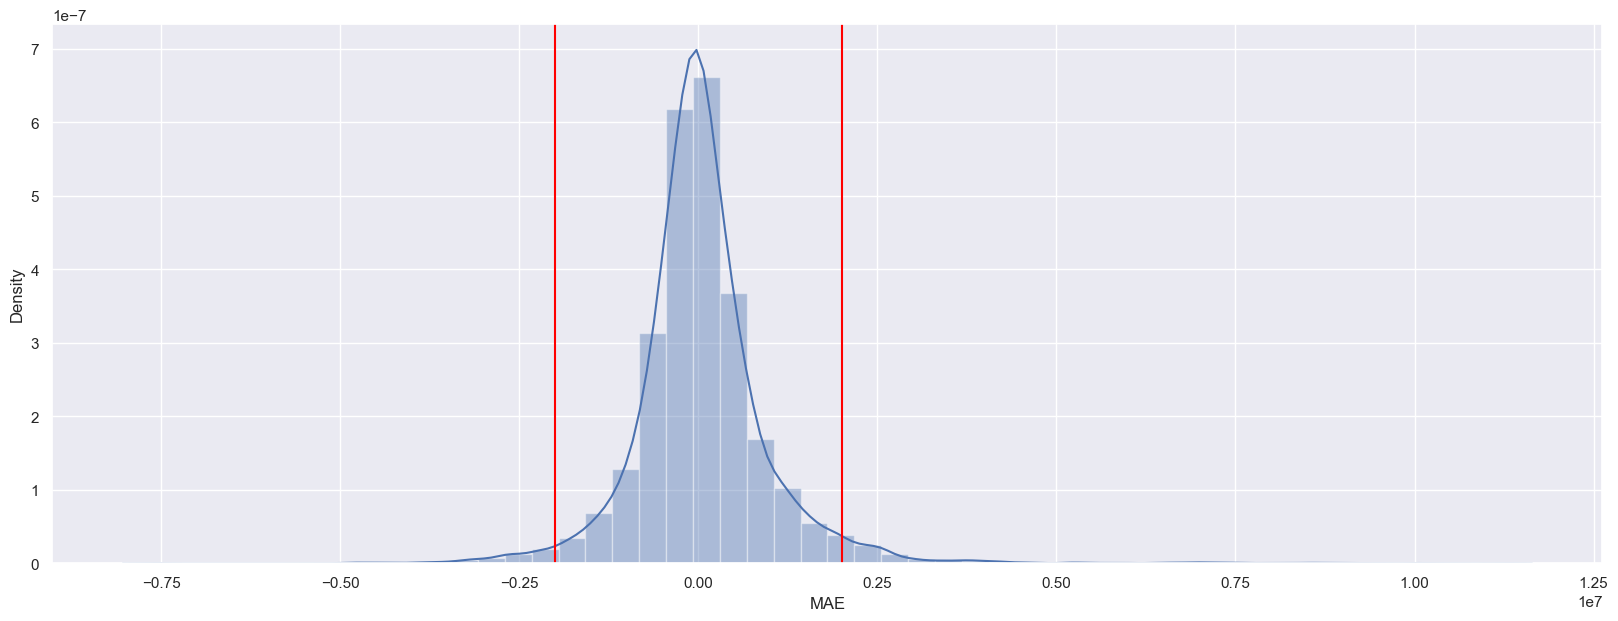

In [80]:
df_4 = df[df['ЖК_БД'] == 'престижный']

g = 2000000

print('Всего:', len(df_4['MAE']))
print('MAE (2 млн):', len(df_4[(df_4['MAE'] < -g) | (df_4['MAE'] > g)]))
print('MAE (2 млн):', round(len(df_4[(df_4['MAE'] < -g) | (df_4['MAE'] > g)]) / len(df_4['MAE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

Всего: 54
MAPE 0.2: 0
MAPE 0.2: 0.0


C:\Users\Silm\AppData\Local\Temp\ipykernel_2668\1098878640.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['MAPE'])


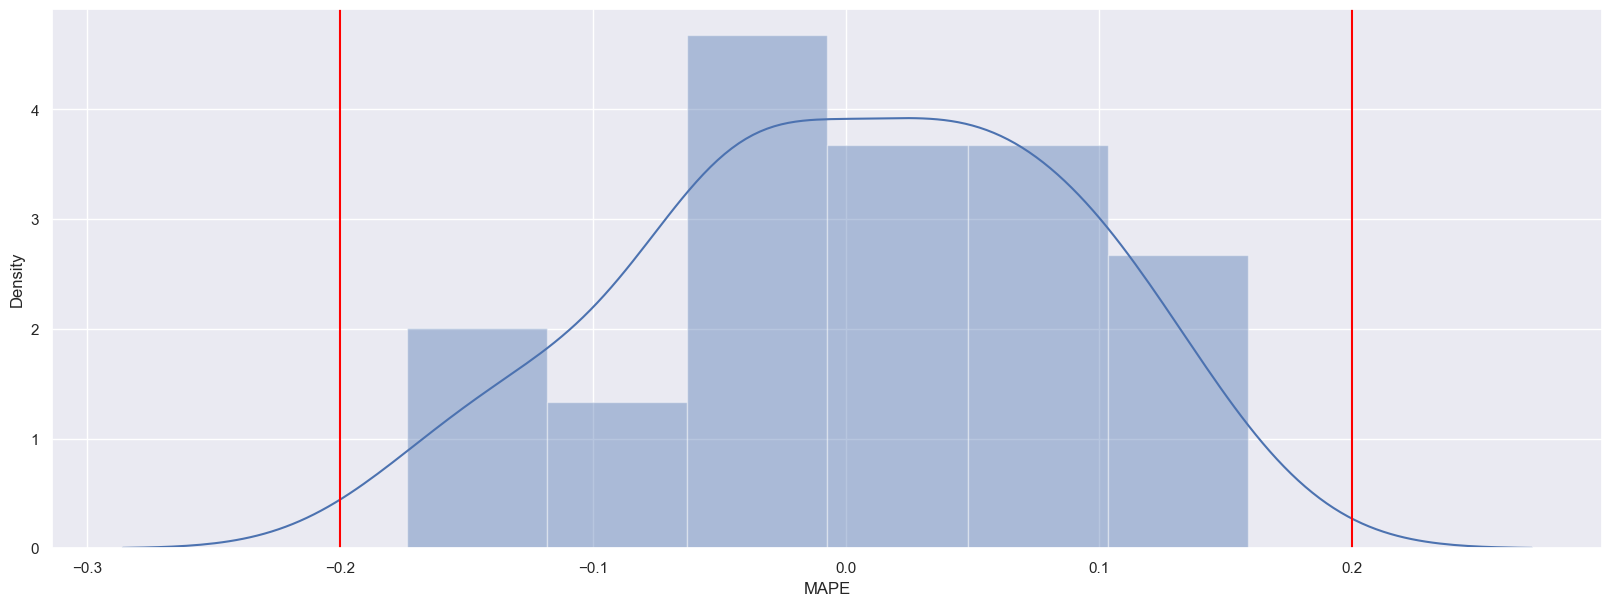

In [83]:
df_4 = df[df['ЖК_БД'] == 'престижный']

g = 0.2

print('Всего:', len(df_4['MAPE']))
print(f'MAPE {g}:', len(df_4[(df_4['MAPE'] < -g) | (df_4['MAPE'] > g)]))
print(f'MAPE {g}:', round(len(df_4[(df_4['MAPE'] < -g) | (df_4['MAPE'] > g)]) / len(df['MAPE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_4['MAPE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

Всего: 1016
MAE (2 млн): 128
MAE (2 млн): 0.126


C:\Users\Silm\AppData\Local\Temp\ipykernel_2668\3763886586.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MAE'])


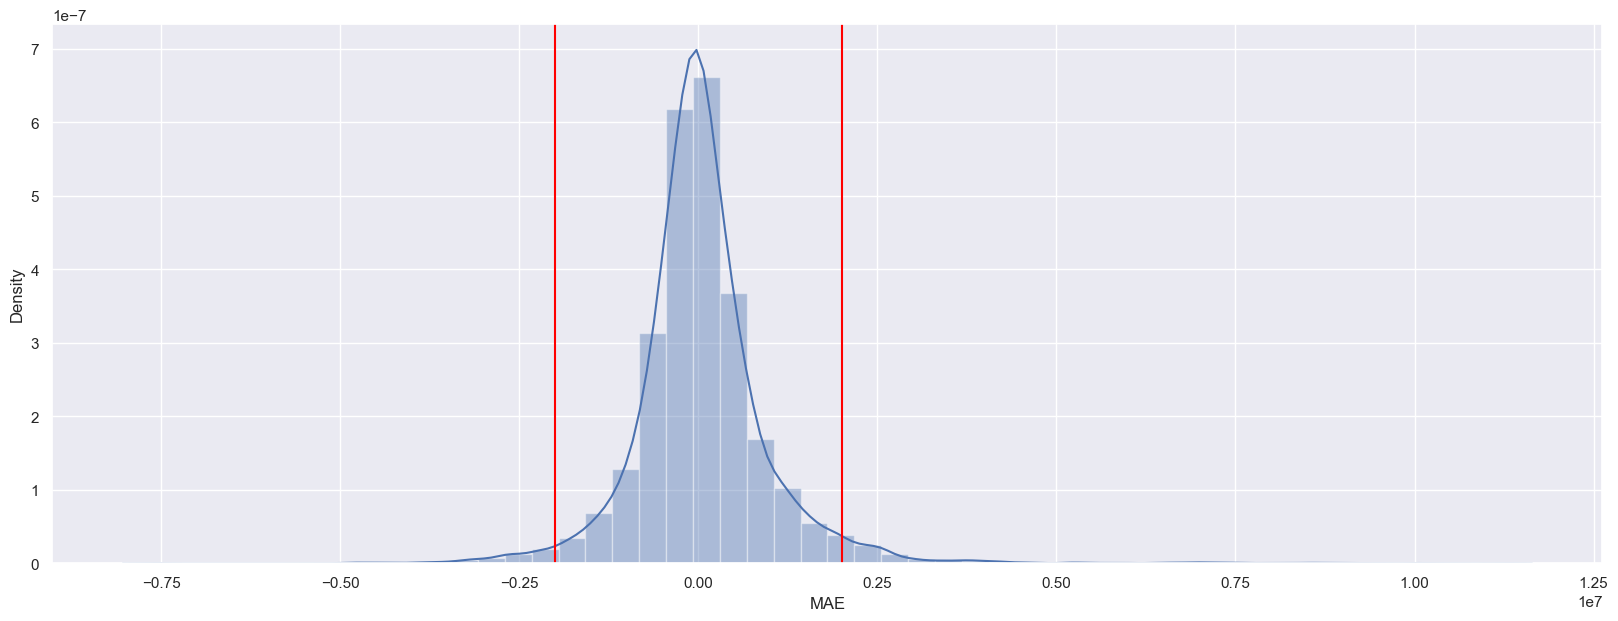

In [88]:
df_4 = df[df['Ремонт_2'] == 'дизайнерский']

g = 2000000

print('Всего:', len(df_4['MAE']))
print('MAE (2 млн):', len(df_4[(df_4['MAE'] < -g) | (df_4['MAE'] > g)]))
print('MAE (2 млн):', round(len(df_4[(df_4['MAE'] < -g) | (df_4['MAE'] > g)]) / len(df_4['MAE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['MAE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')

Всего: 1016
MAPE 0.2: 47
MAPE 0.2: 0.005


C:\Users\Silm\AppData\Local\Temp\ipykernel_2668\2719194083.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_4['MAPE'])


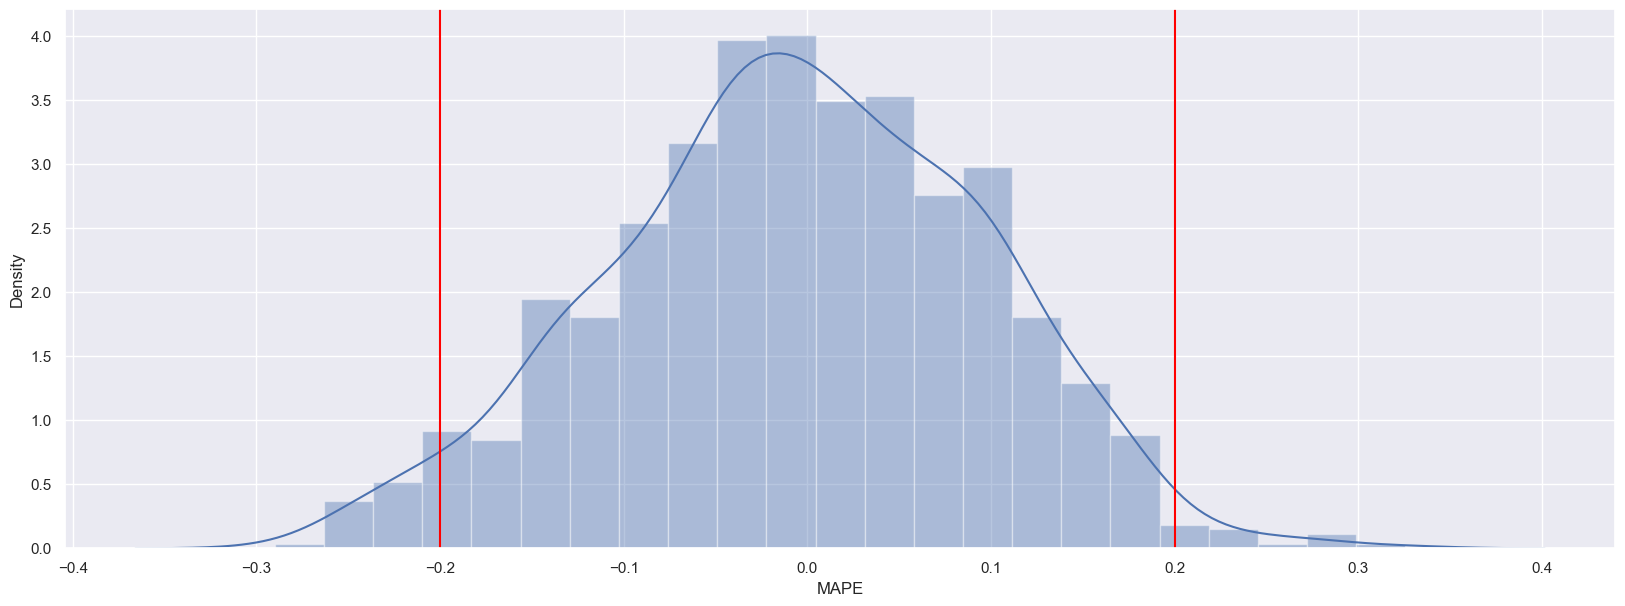

In [89]:
df_4 = df[df['Ремонт_2'] == 'дизайнерский']

g = 0.2

print('Всего:', len(df_4['MAPE']))
print(f'MAPE {g}:', len(df_4[(df_4['MAPE'] < -g) | (df_4['MAPE'] > g)]))
print(f'MAPE {g}:', round(len(df_4[(df_4['MAPE'] < -g) | (df_4['MAPE'] > g)]) / len(df['MAPE']), 3))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_4['MAPE'])

plt.axvline(-g, color = 'red')
plt.axvline(g, color = 'red')